# Title: Project on PlantGrowth R dataset
***

![title](img/GMIT-Galway-Campus.jpg)

In [1]:
# overview of librarys and functions in README
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Project Scope

In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups.  

Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this you should:  

- 1. Download and save the dataset to your repository.

- 2. Describe the data set in your notebook.

- 3. Describe what a t-test is, how it works, and what the assumptions are.

- 4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

- 5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

- 6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

## Introduction
This dataset documents the "Results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions." [1] PlantGrowth: Results from an Experiment on Plant Growth, rdrr, https://rdrr.io/r/datasets/PlantGrowth.html. This dataset is often used for statistical analysis and educational purposes. It contains data on the effect of different treatments on plant growth, specifically the weight of plants under three conditions: a control group and two treatment groups. There are 30 observations with 10 plants in each  group.

## 1. Download and saving the dataset to repository.

I have saved dataset in a folder called *imported_datasets* as a .csv file called plantgrowth. I will use the following code to read file and store the data in data frame called df.

In [2]:
df=pd.read_csv('data_folder/plantgrowth.csv')

## 2. Describing the dataset.

I will use the *.head* & *.tail* to examine first and last 5 rows of data. 

In [3]:
df.head(5)

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [4]:
df.tail(5)

,rownames,weight,group
25,26,5.29,trt2
26,27,4.92,trt2
27,28,6.15,trt2
28,29,5.80,trt2
29,30,5.26,trt2


This dataset includes 2 variables, weight and  group. 

By using *.info* I can see there are 3 columns and 30 rows. There are no null values in the dataset.
- Weight is a numeric variable representing the weight of the plants. Its is a quantitative & continuous variable. It is a float64 dtype
- Group is a categorical variable with 3 levels, 'ctrl' (control group), 'trt1' (treatment 1), and 'trt2' (treatment 2). It is a qualitative variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


Nominal and ratio data types are both used to describe categorical variables. The difference between the two data types is that ordinal data has ordered categories and nominal data does not.

Group is Nominal as the category’s 'ctrl', 'trt1', and 'trt2' have no inherent order

| weight | group |
| --- | --- |
| numerical | categorical |
| Quantitative | Quantitative |
| continuous | categorical |
| ratio* | nominal |
| float | string | 

![title](img/variable.jpg)

*df.describe* displays valuable information about the dataset such as the mean, standard deviation, min & max for each variable.

In [6]:
df.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


I will check the mean of each group. 

In [7]:
mean_weight_per_group = df.groupby('group')['weight'].mean()
print(f"The mean weight per group is :{mean_weight_per_group}")


The mean weight per group is :group
ctrl    5.032
trt1    4.661
trt2    5.526
Name: weight, dtype: float64


This will be explored further below in t-test and ANOVA sections, but the biggest difference between the means is between ctrl & trt1.

In [8]:
df.dtypes

rownames      int64
weight      float64
group        object
dtype: object

I will use  a pairplot to visualise the dataset. A pairplot displays pairwise relationships between variables in the dataset. In this case, it shows the relationship between weight and group.
The hue parameter colours the points by the group variable, allowing us to see how different groups compare. This helps in visualizing any potential correlations or differences between the groups. Pairplot is a module of seaborn library. [2] PAIRPLOT VISUALIZATION, medium.com, https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6. Pairplots can easily display distribution, clustering etc.

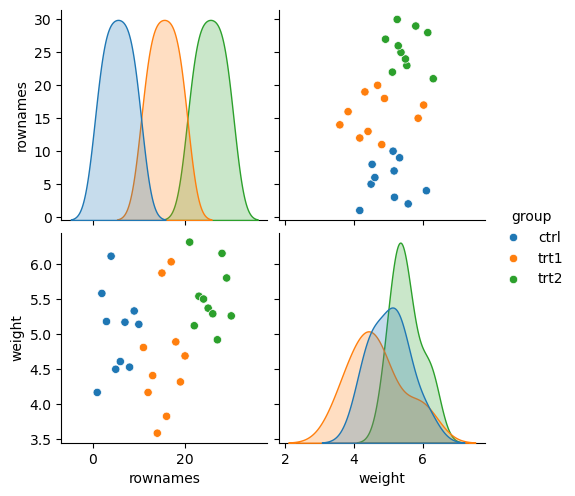

In [9]:
sns.pairplot(df, hue= 'group')
plt.show()

To show there are 10 observations per group I will introduce a countplot. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.

[3] seaborn.countplot, seaborn, https://seaborn.pydata.org/generated/seaborn.countplot.html.

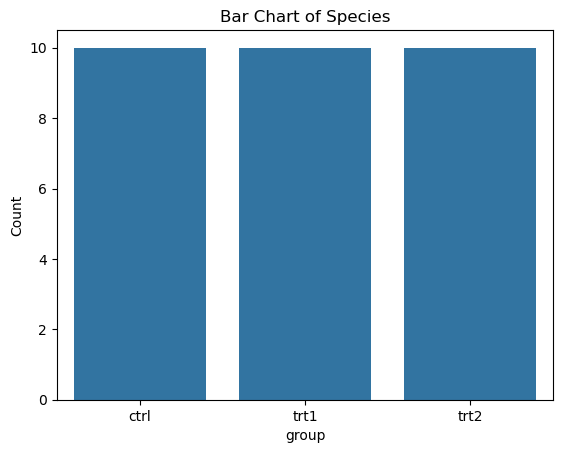

In [10]:
sns.countplot(x='group', data=df)
plt.title('Bar Chart of Species')
plt.xlabel('group')
plt.ylabel('Count')
plt.legend
plt.show()


A boxplot displays the distribution of a continuous variable (weight) across different categories (group). It shows the median, quartiles, and potential outliers for each group. This helps us compare the central tendency and spread of weights across the control and treatment groups.

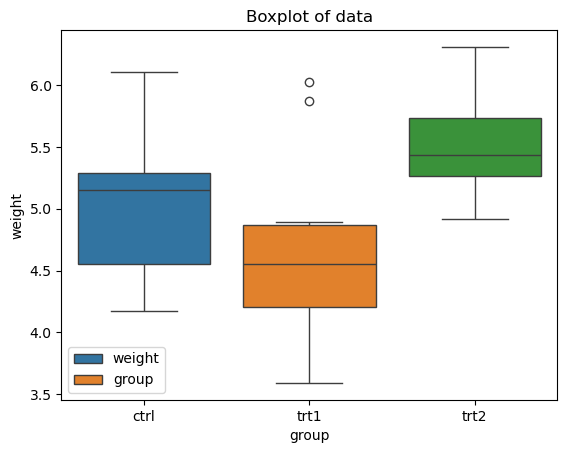

In [11]:
sns.boxplot(data=df, x = 'group', y = 'weight',hue="group" )
plt.title('Boxplot of data')
plt.xlabel('group')
plt.ylabel('weight')
plt.legend(['weight','group'])
plt.show()

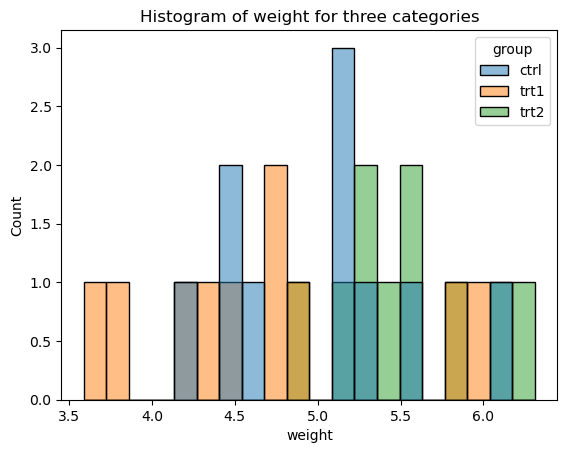

In [12]:
sns.histplot(data=df, x="weight", hue="group", bins=20)
plt.title("Histogram of weight for three categories")
plt.xlabel("weight")
plt.ylabel("Count")
plt.legend
plt.show()

## 3. Describe what a t-test is, how it works, and what the assumptions are.

#### What is a t-test

A t-test is a statistical test used to compare the means of two groups to determine if they are significantly different from each other. It is commonly used in hypothesis testing to assess whether the observed differences between groups are due to chance or if they reflect true differences. The t test is one of the simplest statistical techniques that is used to evaluate whether there is a statistical difference between the means from up to two different samples. The t test is especially useful when you have a small number of sample observations (under 30 or so), and you want to make conclusions about the larger population. [4] The Ultimate Guide to T Tests, GraphPad, https://www.graphpad.com/guides/the-ultimate-guide-to-t-tests

#### how does a t-test work 
t tests make enough assumptions about your experiment to calculate an expected variability, and then they use that to determine if the observed data is statistically significant.  You can test the difference between these two groups using a t test and null and alterative hypotheses.

The null hypothesis (H0) is that the true difference between these group means is zero.
The alternate hypothesis (Ha) is that the true difference is different from zero. [5] An Introduction to t Tests | Definitions, Formula and Examples, Scribbr, https://www.scribbr.com/statistics/t-test/

#### Assumptions of a t-test

[6] An Introduction to t Tests | Definitions, Formula and Examples, Scribbr, https://www.scribbr.com/statistics/t-test/
-  Independence: The observations in each group must be independent of each other.
-  Normality: The data in each group should be approximately normally distributed.
-  Homogeneity of Variances: The variances of the two groups should be approximately equal.
-  Random Sampling: The data should be collected using a random sampling method.


The t-test statistic is calculated using the difference between the group means, the standard deviations, and the sample sizes.
Determine the p-value:

The p-value indicates the probability of observing the data, or something more extreme, if the null hypothesis is true.
Compare the p-value to the Significance Level ((\alpha)):

If the p-value is less than (\alpha) (commonly 0.05), reject the null hypothesis.

 
 #### types of t test

 [7] T Test Overview: How to Use & Examples, Statistics By Jim, https://statisticsbyjim.com/hypothesis-testing/t-test/
The following are the standard t tests:

-  One-sample: Compares a sample mean to a reference value.
-  Two-sample: Compares two sample means.
-  Paired: Compares the means of matched pairs, such as before and after scores.

#### Interpretation of the T-statistic
The t-statistic measures the size of the difference relative to the variation in your sample data. The negative sign indicates the direction of the difference, the mean of the first group is lower than the mean of the second group. The p-value calculated with this t-statistic is used to determine statistical significance.

## 4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

I have imported stats from scipy. As mentioned above, t-test is a simple statistical technique to evaluate whether there is a statistical difference between the means. As there are 3 groups in this dataset, the following code separates the data into 3 groups. ctrl, trt1 & trt2. 

In [13]:
# code for t test
# Separate the data into two treatment groups: trt1 and trt2
trt1 = df[df.group == 'trt1']['weight']
trt2 = df[df.group == 'trt2']['weight']
ctrl = df[df.group == 'ctrl']['weight']

# performing t-test for trt1 & trt2

In [14]:
# Perform a t-test to determine if there is a significant difference between trt1 & trt2
t_stat2, p_value2 = stats.ttest_ind(trt1, trt2)

print(f"T-statistic of control trt1 & trt2 is: {t_stat2:.6f}")
print(f"P-value of control trt1 & trt2 is: {p_value2:.6f}")

# Check if the result is significant
alpha = 0.05
if p_value2 < alpha:
    print("There is a significant difference between the two treatment groups (trt1 & trt2).")
else:
    print("There is no significant difference between the two treatment groups (trt1 & trt2).")

T-statistic of control trt1 & trt2 is: -3.010099
P-value of control trt1 & trt2 is: 0.007518
There is a significant difference between the two treatment groups (trt1 & trt2).


Typically, the alpha threshold is 0.05 and a returned p-value of less than alpha is considered statistically significant. As can be seen above by p-value score is 0.007518, which is less than alpha so there was a significant difference between the two groups.

I will now perform t-test on the following groups.
- ctrl & trt1
- ctrl & trt2

In [15]:
# Perform a t-test to determine if there is a significant difference between control and trt1 group
t_stat, p_value = stats.ttest_ind(ctrl, trt1)

print(f"T-statistic of control and trt1 group is: {t_stat:.6f}")
print(f"P-value of control and trt1 group is: {p_value:.6f}")

# Check if the result is significant
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two treatment groups (control and trt1 group).")
else:
    print("There is no significant difference between the two treatment groups (control and trt1 group).")

T-statistic of control and trt1 group is: 1.191260
P-value of control and trt1 group is: 0.249023
There is no significant difference between the two treatment groups (control and trt1 group).


In [16]:
# Perform a t-test to determine if there is a significant difference between control and trt2 group
t_stat1, p_value1 = stats.ttest_ind(ctrl, trt2)

print(f"T-statistic of control and trt2 group is: {t_stat1:.6f}")
print(f"P-value of control and trt2 group is: {p_value1:.6f}")

# Check if the result is significant
alpha = 0.05
if p_value1 < alpha:
    print("There is a significant difference between the two treatment groups (ctrl and trt2 group).")
else:
    print("There is no significant difference between the two treatment groups (ctrl and trt2 group).")

T-statistic of control and trt2 group is: -2.134020
P-value of control and trt2 group is: 0.046851
There is a significant difference between the two treatment groups (ctrl and trt2 group).


### t-test Conclusion
Typically, the alpha threshold is 0.05 and a returned p-value of less than alpha is considered statistically significant. As can be seen above by p-value scores, the only 2 groups with no significant difference between the two treatment groups are control and trt1. A p-value of 0.0468 between these groups indicates that the observed difference in plant growth could be due to random variation. The other t-tests performed indicated that there was a significant difference between the two groups based on the respective p-values. 

***

## 5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

#### Anova description
Anova stands for Analysis of Variance.  Anova is a  statistical method used to compare the means of three or more groups to determine if there are any statistically significant differences among them. ANOVA assesses the variability within and between groups to help researchers understand if the observed differences are due to chance or indicate true effects.[8] ANOVA (Analysis of variance),ResearchMethod.Net, https://researchmethod.net/anova/. In short they help determine if the null hypotheses is rejected or the alternate hypotheses is accepted [9] Anova Formula,geeksforgeeks.org, https://www.geeksforgeeks.org/anova-formula/

#### results of Anova

[10] A Simple Guide to Understanding the F-Test of Overall Significance in Regression, statology, https://www.statology.org/a-simple-guide-to-understanding-the-f-test-of-overall-significance-in-regression/

- Null hypothesis (H0) : The model with no predictor variables (also known as an intercept-only model) fits the data as well as your regression model. 

- Alternative hypothesis (HA) : Your regression model fits the data better than the intercept-only model.

#### types of Anova 

The types of Anova are ;
- one way Anova which compares the means of three or more groups based on a *single independent variable*
- two way Anova is used when there are *two independent variables*
- repeated measure Anova s used when the same subjects are tested under different conditions over time
- Manova (multivariate) handles multiple dependent variables

#### limitations of Anova
Anova determines if variables are significantly different, but it does not distinguish which variables are statistically significant. The one way ANOVA is an omnibus test statistic. This implies that the test will determine whether the means of the various groups are statistically significant or not. However, it cannot distinguish the specific groups that have a statistically significant mean. [11] ANOVA Test, CUEMATH, https://www.cuemath.com/anova-formula/. Significantly different indicates the results didn't happen by chance [12] F Statistic / F Value: Simple Definition and Interpretation, Statistics How To, https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/

To identify which specific groups are different, post-hoc tests like *Tukey's test* are performed.

![anova](img/anova.jpg)

#### Results of Anova

1. F-statistic 
The f-statistic represents the ratio of the variance between the groups to the variance within the groups.[13] Understanding ANOVA: When and How to Use It in Your Research, statology, https://www.statology.org/understanding-anova-when-and-how-to-use-it-in-your-research/

- F-statistic: Mean Squares Treatment / Mean Squares Error. A higher F-statistic suggests that there is more variability between the group means than within the groups, which can indicate a significant difference between the groups.

2. p-value
To determine if the difference between group means is statistically significant, the corresponding p-value is interpreted.

The F statistic must be used in combination with the p value when you are deciding if your overall results are significant or not. [14] F Statistic / F Value: Simple Definition and Interpretation, Statistics How To, https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/

#### 5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

The following code performs one-way Anova on the dataset and prints the f-statistic and the p-value

In [17]:
# Perform ANOVA
anova_result = stats.f_oneway(df[df['group'] == 'ctrl']['weight'],
                              df[df['group'] == 'trt1']['weight'],
                              df[df['group'] == 'trt2']['weight'])

# Print the results
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

ANOVA result: F-statistic = 4.846087862380136, p-value = 0.0159099583256229


In [18]:
alpha = 0.05
if anova_result.pvalue < alpha:
    print("There is a significant difference between groups ctrl,trt1 & trt2.")
else:
    print("There is no significant difference between groups ctrl,trt1 & trt2.")

There is a significant difference between groups ctrl,trt1 & trt2.


#### Results of ANOVA test
p-value = 0.0159: This value tells us the probability that the observed differences between the group means occurred by chance. *alpha* is 0.05 which is a common threshold for statistical significance. The p-value is less than 0.05.

Interpretation:
Since the p-value is less than 0.05, we reject the null hypothesis. This means there is a statistically significant difference between the means of the three treatment groups (ctrl, trt1, and trt2). In other words, at least one of the treatment groups has a different mean weight compared to the others. To identify which groups are different, Post-Hoc Tests like Tukey's  is used. 

#### Brief overview of Tukey’s honestly significant difference (HSD)
Tukey’s honestly significant difference (HSD) test performs pairwise comparison of means for a set of samples. Tukey’s HSD is a post hoc test used to compare the mean of each sample to the mean of each other sample. The null hypothesis is that the distributions underlying the samples all have the same mean. The test statistic, which is computed for every possible pairing of samples, is simply the difference [15] tukey_hsd,SciPy, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html

The following code for Tukey which I have altered was sourced here [16] How to Perform Tukey’s Test in Python,Statology, https://www.statology.org/tukey-test-python/

In [19]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['weight'], groups=df['group'], alpha=0.05)

# Print the results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


- ctrl vs. trt1: The mean difference is -0.371, with a p-value of 0.3909. Since the p-value is greater than 0.05, the difference is not statistically significant.
- ctrl vs. trt2: The mean difference is 0.494, with a p-value of 0.198. Again, the p-value is greater than 0.05, so the difference is not statistically significant.
- trt1 vs. trt2: The mean difference is 0.865, with a p-value of 0.012. Here, the p-value is less than 0.05, indicating a statistically significant difference.
As seen when performing t-tests above, there is a significant difference between the two treatment groups (trt1 & trt2) but not between the remaining groups.

## 6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

 Performing multiple t-tests on the same data is inefficient and time consuming. This is especially true when the number of groups in the dataset increases. ANOVA is designed to compare the means of three or more groups simultaneously. ANOVA provides a single test to determine if there are any significant differences among the group means, simplifying the analysis process. 
 
 Another reason ANOVA is more appropriate to apply than several t-tests is because every time a t-test is conducted, the chances of making a type I error increases. A Type I error is a false positive. Rejecting the null hypothesis when it is in fact true is called a *Type I error* [17] Type I and II Errors and Significance Levels, web.ma.utexas.edu, https://web.ma.utexas.edu/users/mks/statmistakes/errortypes.html
"This error is usually 5%. By running two t-tests on the same data you will have increased your chance of "making a mistake" to 10%." [18] One-way ANOVA, statistics.laerd, https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php. For each t-test there is a chance that we will commit a type I error, which is the probability that we reject the null hypothesis when it is actually true. ANOVA controls for these errors so that the Type I error remains at just 5%.

# Conclusion
As mentioned, this dataset documents the "Results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions. After loading the dataset into a dataframe called *df*, it is clear the dataset is balanced with 10 observations per group. (ctrl, trt1 & trt2)

For the *t-test* performed, an *alpha* 0f 0.05 was used. The t-test results indicated the two treatment groups with no significant are ctrl and trt1 based on p-value being greater than alpha. The t-tests between the other groups returned p-values less than alpha, indicating there was a significant difference between the groups.

ANOVA (Analysis of Variance) is a statistical method used to compare the means of three or more groups to see if at least one group mean is significantly different from the others. For the *ANOVA* tests, an *alpha* 0f 0.05 was used. The ANOVA tests performed in this notebook were to investigate if there are significant differences in plant growth across the three groups ctrl, trt1 & trt2. The resulting p-value of 0.0159 is less than alpha, this indicates that at least one group mean is significantly different from the others. ANOVA can only tell if there is a significant difference between the means of at least two groups, but it can’t explain which pair differs in their means. To identify which groups are different, Post-Hoc Tests like Tukey's HSD is used. 

# References
- [1] PlantGrowth: Results from an Experiment on Plant Growth, rdrr, https://rdrr.io/r/datasets/PlantGrowth.html.
- [2] PAIRPLOT VISUALIZATION, medium.com, https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6.
- [3] seaborn.countplot, seaborn, https://seaborn.pydata.org/generated/seaborn.countplot.html.
- [4] The Ultimate Guide to T Tests, GraphPad, https://www.graphpad.com/guides/the-ultimate-guide-to-t-tests
- [5] An Introduction to t Tests | Definitions, Formula and Examples, Scribbr, https://www.scribbr.com/statistics/t-test/
- [6] An Introduction to t Tests | Definitions, Formula and Examples, Scribbr, https://www.scribbr.com/statistics/t-test/
- [7] T Test Overview: How to Use & Examples, Statistics By Jim, https://statisticsbyjim.com/hypothesis-testing/t-test/
- [8] ANOVA (Analysis of variance),ResearchMethod.Net, https://researchmethod.net/anova/.
- [9] Anova Formula,geeksforgeeks.org, https://www.geeksforgeeks.org/anova-formula/
- [10] A Simple Guide to Understanding the F-Test of Overall Significance in Regression, statology, https://www.statology.org/-simple-guide-to-understanding-the-f-test-of-overall-significance-in-regression/
- [11] ANOVA Test, CUEMATH, https://www.cuemath.com/anova-formula/. 
- [12] F Statistic / F Value: Simple Definition and Interpretation, Statistics How To, https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/
- [13] Understanding ANOVA: When and How to Use It in Your Research, statology, https://www.statology.org/understanding-anova-when-and-how-to-use-it-in-your-research/
- [14] F Statistic / F Value: Simple Definition and Interpretation, Statistics How To, https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/
- [15] tukey_hsd,SciPy, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
- [16] How to Perform Tukey’s Test in Python,Statology, https://www.statology.org/tukey-test-python/
- [17] Type I and II Errors and Significance Levels, web.ma.utexas.edu, https://web.ma.utexas.edu/users/mks/statmistakes/errortypes.html
- [18] One-way ANOVA, statistics.laerd, https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php





***